##2.1

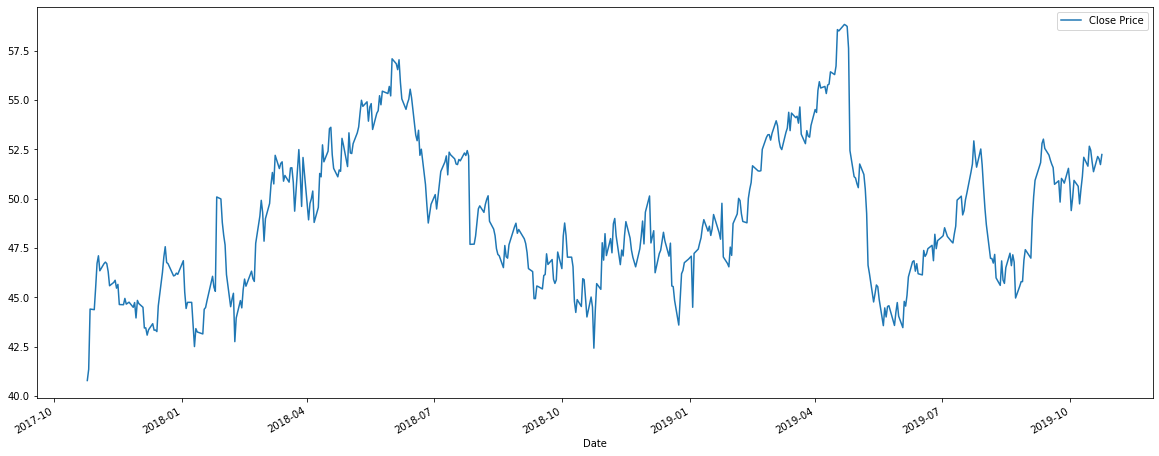

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('week2.csv')
df['Date']= pd.to_datetime(df['Date'])
da = [i for i in df["Date"]]
df.set_index("Date", inplace = True)

del df["Unnamed: 0"]
df.plot(y = "Close Price", figsize=(20,8))

##2.2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


<StemContainer object of 3 artists>

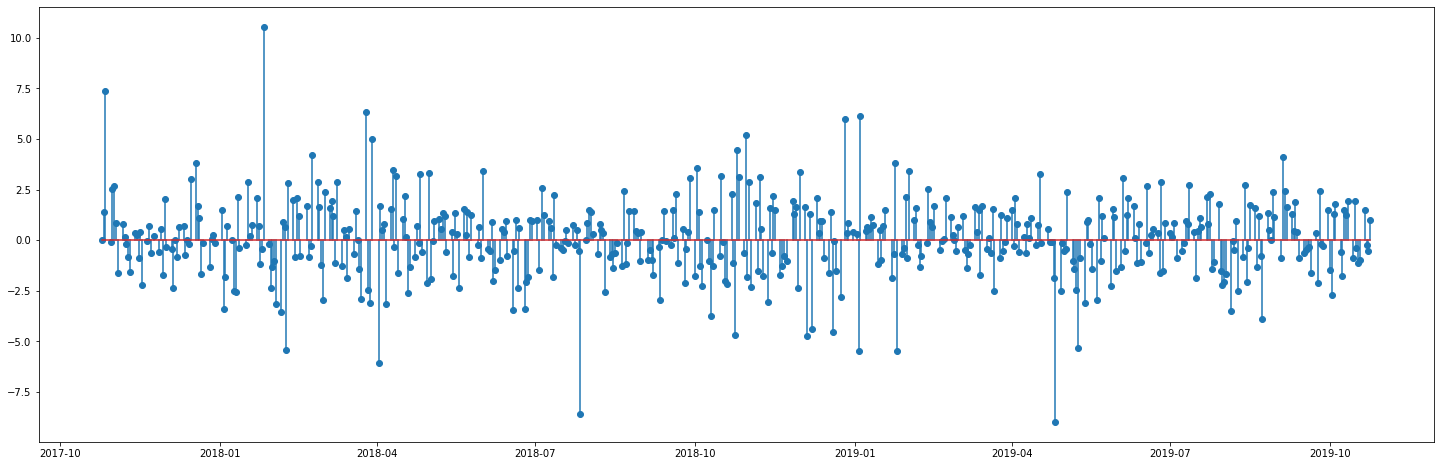

In [2]:
plt.figure(figsize=(25,8))
plt.stem(da, df["day_perc_change"])

##2.3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


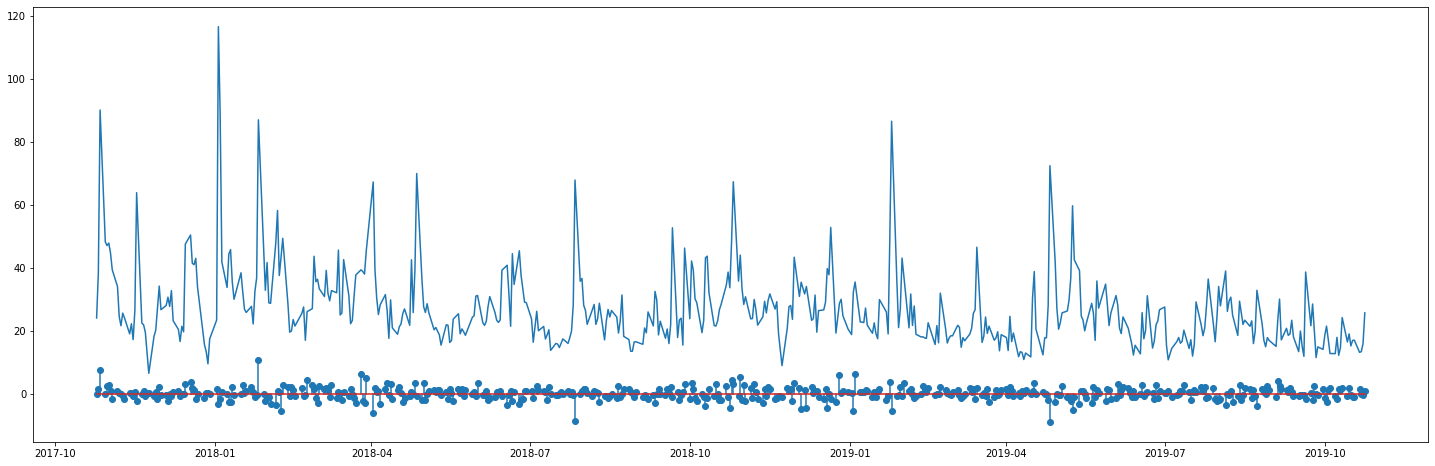

In [3]:
plt.close()
plt.figure(figsize=(25,8))
plt.stem(da, df["day_perc_change"],label="stem")
plt.plot(df["Total Traded Quantity"]/1000000, label="volume")
plt.show()
plt.close()

##2.4

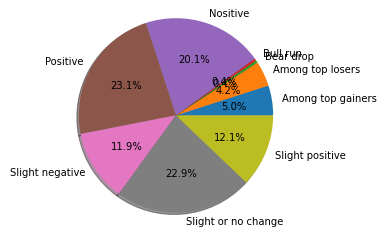

In [4]:

df1=df.groupby(df['Trend']).count()
labels=df1.index.values
freq=df1['Close Price']

fig1, ax1 = plt.subplots()
ax1.pie(freq,labels=labels, autopct='%1.1f%%',shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
plt.close()


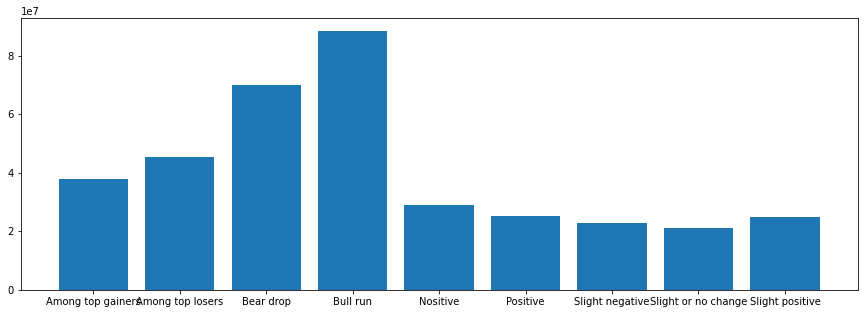

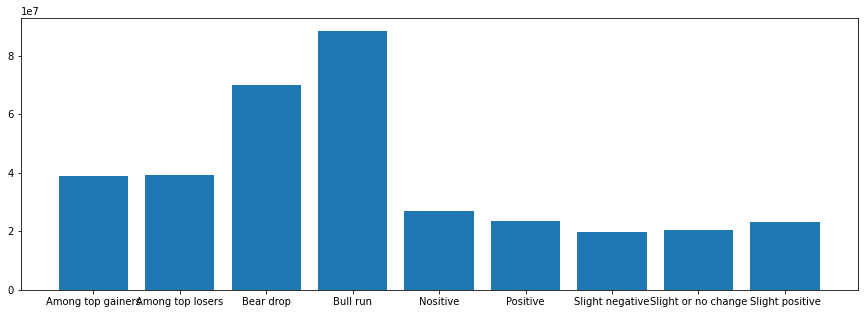

In [5]:
y1=df.groupby(df['Trend']).mean()['Total Traded Quantity'].values
y2=df.groupby(df['Trend']).median()['Total Traded Quantity'].values
labels=df1.index.values

plt.figure(figsize=(15,5))
plt.bar(labels,y1)
plt.show()
plt.figure(figsize=(15,5))
plt.bar(labels,y2)
plt.show()
plt.close()


##2.5

(array([  2.,   5.,  13.,  91., 225., 134.,  26.,   5.,   1.,   1.]),
 array([-8.99149453, -7.03715744, -5.08282035, -3.12848326, -1.17414617,
         0.78019092,  2.73452801,  4.68886511,  6.6432022 ,  8.59753929,
        10.55187638]),
 <a list of 10 Patch objects>)

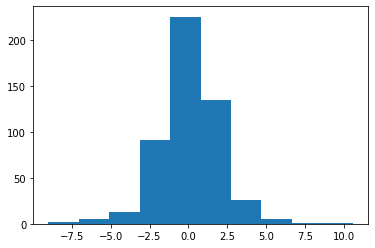

In [6]:
plt.hist(df['day_perc_change'])

##2.6

In [7]:
df5 = pd.DataFrame()
df_temp = pd.read_csv('AXISBANK.csv')
df5["AxisBank"] = df_temp[df_temp["Series"] == "EQ"]["Close Price"]
df_temp = pd.read_csv('HDFCBANK.csv')
df5["HDFCBank"] = df_temp[df_temp["Series"] == "EQ"]["Close Price"]
df_temp = pd.read_csv('INFY.csv')
df5["Infosys"] = df_temp[df_temp["Series"] == "EQ"]["Close Price"]
df_temp = pd.read_csv('TCS.csv')
df5["TCS"] = df_temp[df_temp["Series"] == "EQ"]["Close Price"]
df_temp = pd.read_csv('TITAN.csv')
df5["Titan"] = df_temp[df_temp["Series"] == "EQ"]["Close Price"]
df5.head()

,AxisBank,HDFCBank,Infosys,TCS,Titan
0,500.1,1553.40,951.55,2365.10,483.65
1,501.5,NaN,955.00,2429.15,488.30
2,502.8,1559.65,952.80,2455.35,481.75
3,492.0,1557.15,961.75,2536.20,471.65
4,501.7,NaN,957.95,2507.15,471.15


In [8]:
df6=pd.DataFrame()
df6["AxisBank"] = (df5['AxisBank'].pct_change().dropna())*(100)
df6["HDFCBank"] = (df5['HDFCBank'].pct_change().dropna())*(100)
df6["Infosys"] = (df5['Infosys'].pct_change().dropna())*(100)
df6["TCS"] = (df5['TCS'].pct_change().dropna())*(100)
df6["Titan"] = (df5['Titan'].pct_change().dropna())*(100)

print(df6.head())


   AxisBank  HDFCBank   Infosys       TCS     Titan
1  0.279944  0.000000  0.362566  2.708131  0.961439
2  0.259222  0.402343 -0.230366  1.078567 -1.341388
3 -2.147971 -0.160292  0.939337  3.292810 -2.096523
4  1.971545  0.000000 -0.395113 -1.145414 -0.106011
5  0.119593 -0.003211  0.365364  0.965239  2.175528


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


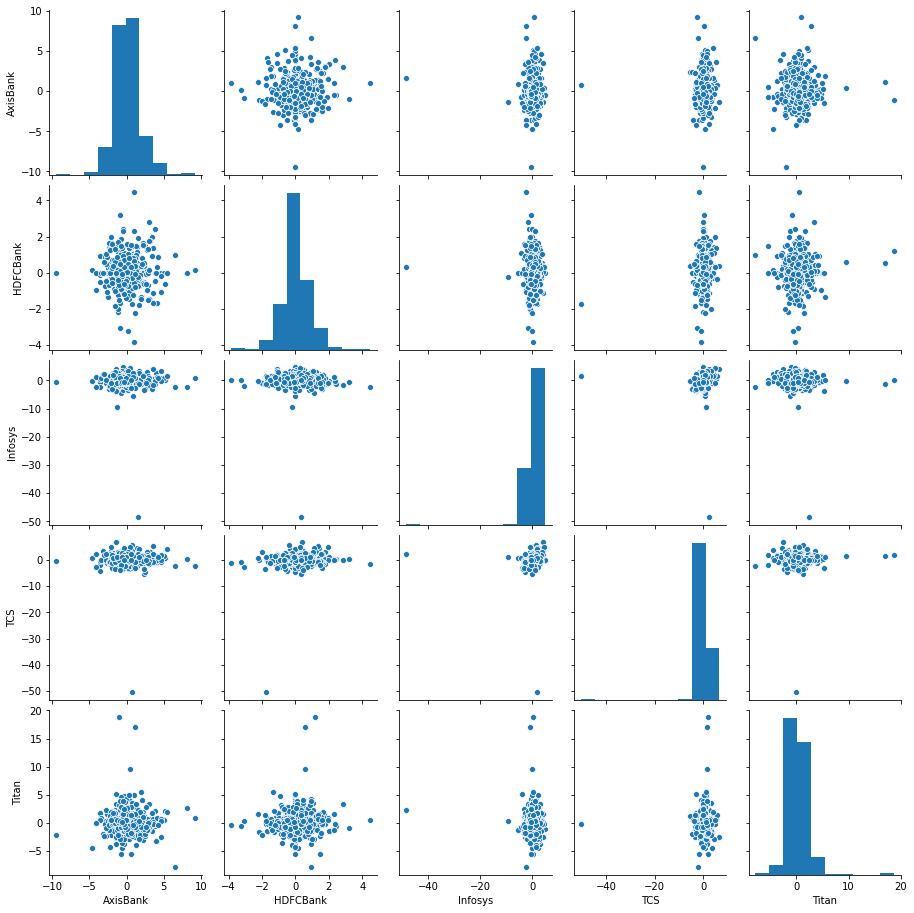

In [9]:
import seaborn as sns

sns.pairplot(df6)
plt.show()

##2.7

Text(0.5, 1.0, 'Volatility')

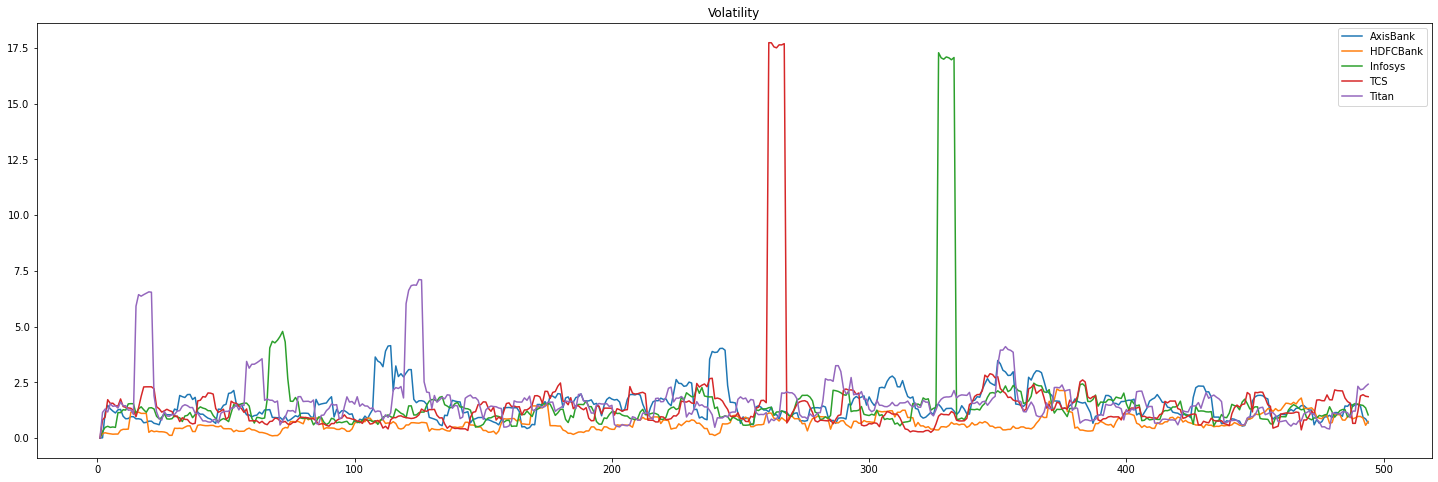

In [11]:
plt.figure(figsize=(25,8))
plt.plot(df6[['AxisBank','HDFCBank','Infosys','TCS','Titan']].rolling(7,min_periods=1).std(ddof=0))
plt.legend(['AxisBank','HDFCBank','Infosys','TCS','Titan'])
plt.title('Volatility')

##2.8

Text(0.5, 1.0, 'Volatility')

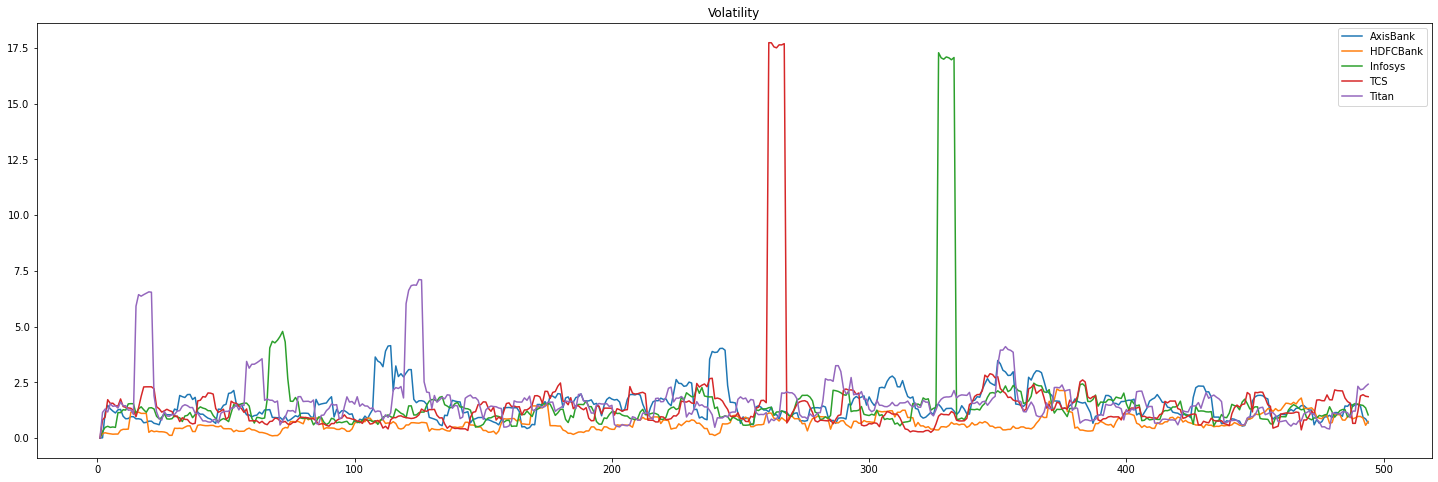

In [12]:
dfn=pd.read_csv('Nifty50.csv')
df6['Nifty']=(dfn['Close'].pct_change().dropna())*(100)

plt.figure(figsize=(25,8))
plt.plot(df6[['AxisBank','HDFCBank','Infosys','TCS','Titan']].rolling(7,min_periods=1).std(ddof=0))
plt.legend(['AxisBank','HDFCBank','Infosys','TCS','Titan','Nifty'])
plt.title('Volatility')


##2.9

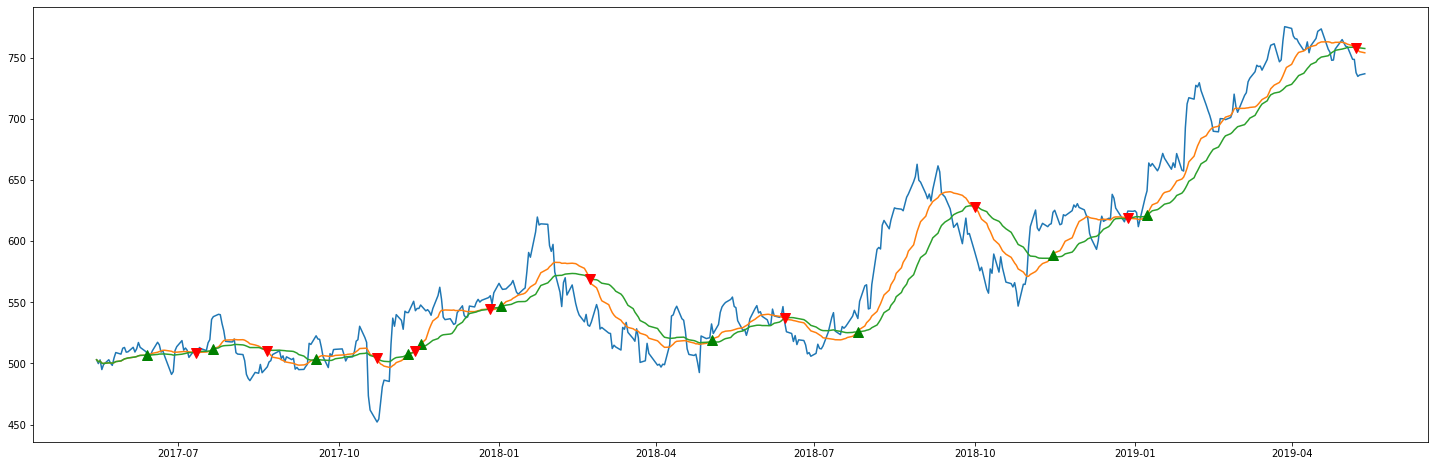

In [15]:
import numpy as np
plt.close()
df2=pd.read_csv('AXISBANK.csv')
dfp = pd.DataFrame()
dfp["Average Price"] = df2[df2["Series"] == "EQ"]["Average Price"]
dfp["Date"] = df2[df2["Series"] == "EQ"]["Date"]
dfp['Date']= pd.to_datetime(dfp['Date'])

date = pd.to_datetime(dfp['Date'])

dfp.set_index("Date", inplace = True)

dfp['21'] = dfp[["Average Price"]].rolling(21,min_periods=1).mean()
dfp['34'] = dfp[["Average Price"]].rolling(34,min_periods=1).mean()
plt.figure(figsize=(25,8))
plt.plot(dfp[["Average Price"]])
plt.plot(dfp['21'])
plt.plot(dfp['34'])

signals = pd.DataFrame(index=date)
signals['signal'] = 0
signals['signal'][21:] = np.where(dfp['21'][21:] > dfp['34'][21:], 1, 0)
signals['position'] = signals['signal'].diff().fillna(0)
signals['short_mavg'] = dfp['21'].tolist()
signals['long_mavg'] = dfp['34'].tolist()
signals.head()

plt.plot(signals.loc[signals.position == 1].index, signals['short_mavg'][signals.position == 1], '^', markersize=10, color='green', label='Buy')
plt.plot(signals.loc[signals.position == -1].index, signals['short_mavg'][signals.position == -1], 'v', markersize=10, color='red', label='Sell')

plt.show()


##2.10

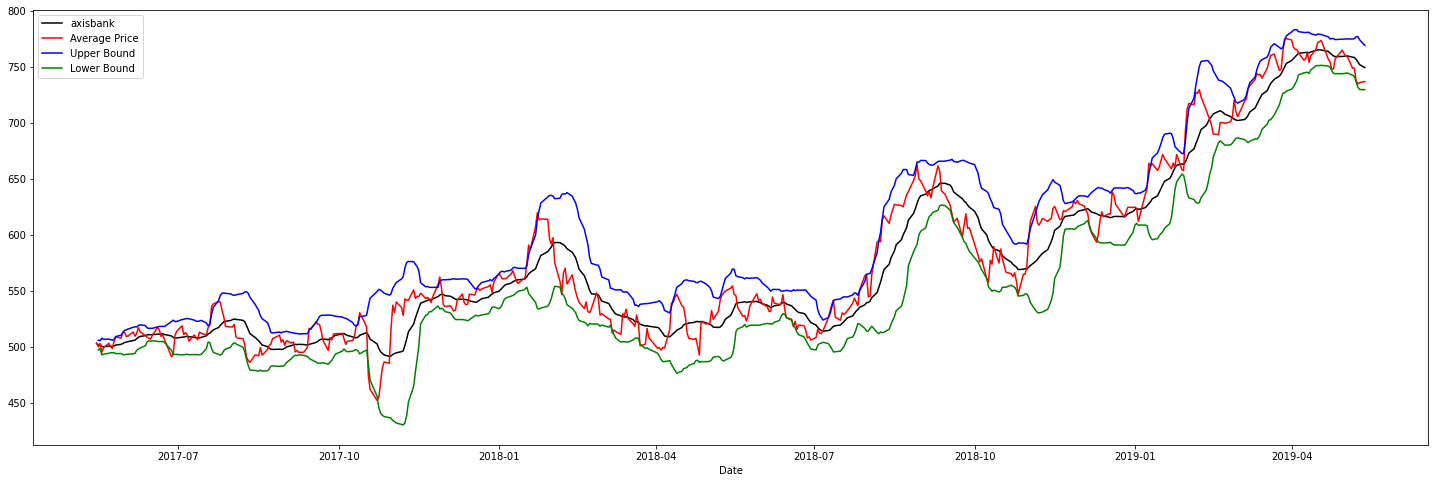

In [21]:
axisbank_mean_14=dfp[['Average Price']].rolling(14,min_periods=1).mean()
axisbank_std_14=dfp[['Average Price']].rolling(14,min_periods=1).std()

upper = axisbank_mean_14 + 2*axisbank_std_14
lower = axisbank_mean_14 - 2*axisbank_std_14

plt.figure(figsize=(25,8))
plt.plot(axisbank_mean_14, color='black', label='axisbank')
plt.plot(dfp['Average Price'], color='red', label='Average Price')
plt.plot(upper, color='blue', label='Upper Bound')
plt.plot(lower, color='green', label='Lower Bound')
plt.xlabel('Date')
plt.legend()
plt.show()
plt.close()